In [1]:
from neuralhydrology.datasetzoo.hourlyharz import load_hourly_harz_attributes
from neuralhydrology.datasetzoo.hourlyharz import load_hourly_harz_timeseries
from neuralhydrology.datasetzoo.hourlyharz import HourlyHarz
from pathlib import Path
import os
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rcParams["grid.color"] = "#eeeeee"
mpl.rcParams["grid.linewidth"] = 0.5
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams.update({'font.size': 11})

In [3]:
data_dir = Path('../../data/harz')

In [4]:
df_attributes = load_hourly_harz_attributes(data_dir)

## Print all static inputs of the dataset

In [5]:
df_attributes

,aquitard_perc,aquifer_perc,aquifer_aquitard_mixed_perc,kf_very_high_perc,kf_high_perc,kf_medium_perc,kf_moderate_perc,kf_low_perc,kf_very_low_perc,kf_extremely_low_perc,...,elev_95,elev_max,dams_names,dams_river_names,dams_num,dams_year_first,dams_year_last,dams_total_lake_area,dams_total_lake_volume,dams_purposes
gauge_id,,,,,,,,,,,,,,,,,,,,,
DE1,96.59,3.41,0.0,0.0,0.0,2.84,0.0,0.0,0.00,0.0,...,NaN,NaN,Innerste Talsperre|Mittlerer Pfauenteich|Mittl...,Zellbach|Innerste|Oberharze,3.0,1551.0,1966.0,1.56,20.04,Flood control|Water supply|Recreational use|En...
DE2,100.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,NaN,NaN,Oker Talsperre|Okertalsperre Vorsperre|Fortune...,Jägersbleeker Teich|Hellertalbach|booker,4.0,1670.0,1956.0,2.54,48.24,Flood control|Water supply|Recreational use|Na...
DE3,100.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,10.04,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.00,0.00,NaN
DE4,99.98,0.02,0.0,0.0,0.0,0.02,0.0,0.0,0.00,0.0,...,NaN,NaN,Sösetalsperre Vorsperre|Söse Talsperre,Söse,2.0,1931.0,1931.0,1.37,26.09,Flood control|Transport|Energy production|Wate...
DE5,100.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,NaN,NaN,Grane Talsperre,Grane,1.0,1969.0,1969.0,2.19,46.39,Flood control|Energy production|Water supply
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DEG10580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,775.27,942.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEG10590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,736.47,988.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEG10600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,474.93,545.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# print every single column
for col in df_attributes.columns:
    print(col)

aquitard_perc
aquifer_perc
aquifer_aquitard_mixed_perc
kf_very_high_perc
kf_high_perc
kf_medium_perc
kf_moderate_perc
kf_low_perc
kf_very_low_perc
kf_extremely_low_perc
kf_very_high_to_high_perc
kf_medium_to_moderate_perc
kf_low_to_extremely_low_perc
kf_highly_variable_perc
kf_moderate_to_low_perc
cavity_fissure_perc
cavity_pores_perc
cavity_fissure_karst_perc
cavity_fissure_pores_perc
rocktype_sediment_perc
rocktype_metamorphite_perc
rocktype_magmatite_perc
consolidation_solid_rock_perc
consolidation_unconsolidated_rock_perc
geochemical_rocktype_silicate_perc
geochemical_rocktype_silicate_carbonatic_perc
geochemical_rocktype_carbonatic_perc
geochemical_rocktype_sulfatic_perc
geochemical_rocktype_silicate_organic_components_perc
geochemical_rocktype_anthropogenically_modified_through_filling_perc
geochemical_rocktype_sulfatic_halitic_perc
geochemical_rocktype_halitic_perc
waterbody_perc
no_data_perc
artificial_surfaces_perc
agricultural_areas_perc
forests_and_seminatural_areas_perc
wet

## Plot discharge data of all 5 reservoir inflows in the Harz

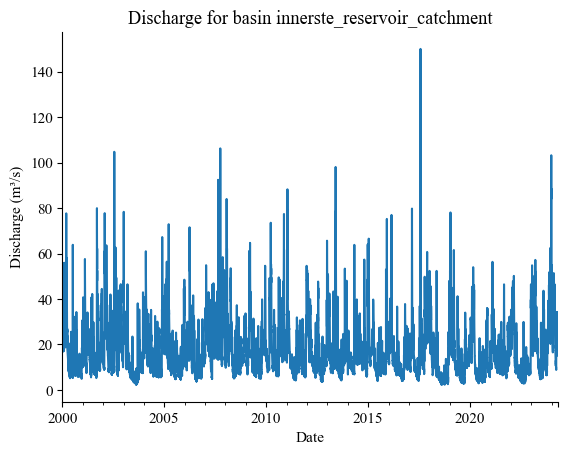

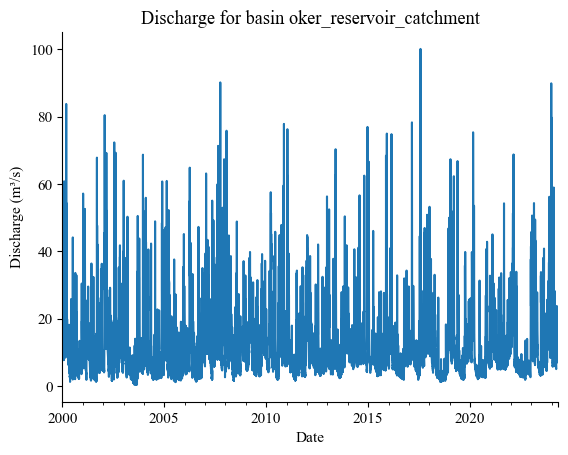

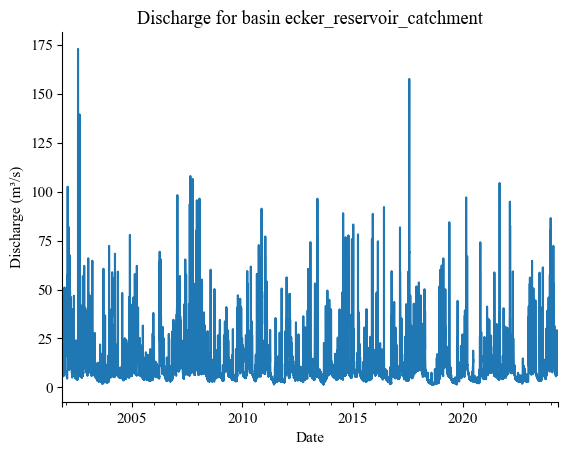

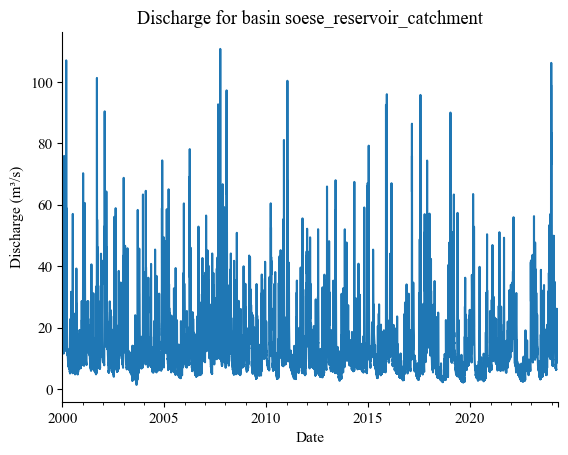

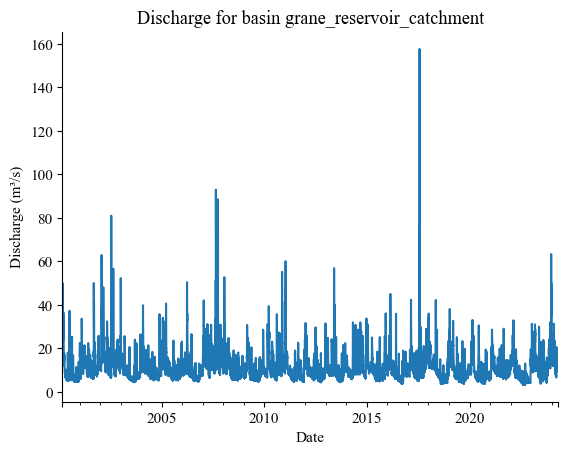

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Set data directory
data_dir = Path('../../data/harz/')

# List of basin IDs
basin_ids = ['DE1', 'DE2', 'DE3', 'DE4', 'DE5']

# create mapping
basin_id_mapping = {
    'DE1': 'innerste_reservoir_catchment',
    'DE2': 'oker_reservoir_catchment',
    'DE3': 'ecker_reservoir_catchment',
    'DE4': 'soese_reservoir_catchment',
    'DE5': 'grane_reservoir_catchment'
}

for basin_id in basin_ids:
    # Load the discharge data for the current basin
    df_discharge = load_hourly_harz_timeseries(data_dir, basin=basin_id)
    
    # Plot the discharge data
    df_discharge['discharge_vol'].plot()

    # Add labels to the x and y axes
    plt.xlabel('Date')
    plt.ylabel('Discharge (m³/s)')

    # Add a title to the plot
    plt.title(f'Discharge for basin {basin_id_mapping[basin_id]}')

    # Display the plot
    plt.show()

## Print dynamic inputs

In [8]:
for col in df_discharge.columns:
    print(col)

discharge_vol
water_level
temperature_2m
relative_humidity_2m
dew_point_2m
precipitation
rain
snowfall
surface_pressure
et0_fao_evapotranspiration
wind_direction_10m
soil_moisture_0_to_7cm
soil_moisture_7_to_28cm
soil_moisture_28_to_100cm
shortwave_radiation
